<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [21]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
register_matplotlib_converters() # Allow matplotlib have access to timestamp 

In [22]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(1975, 1, 1)
end = dt.datetime.today()
NetLendingGov = pdr.data.DataReader('AD01RC1Q027SBEA', 'fred', start, end)
NetLendingPriv = pdr.data.DataReader('W994RC1Q027SBEA', 'fred', start, end)
CA = pdr.data.DataReader('NETFI', 'fred', start, end)

The identity of interest is called Sectoral Balance
$$
(S-I) + (M - X)=(G-T)
$$

It says that deficit of govertment will always reflect in private and foreign surplus. This is a framework mostly used by Montery Monetary Theory, rarely seen in main stream.

The data is from FRED, also we plot the shaded area for recession which deemed by NBER.

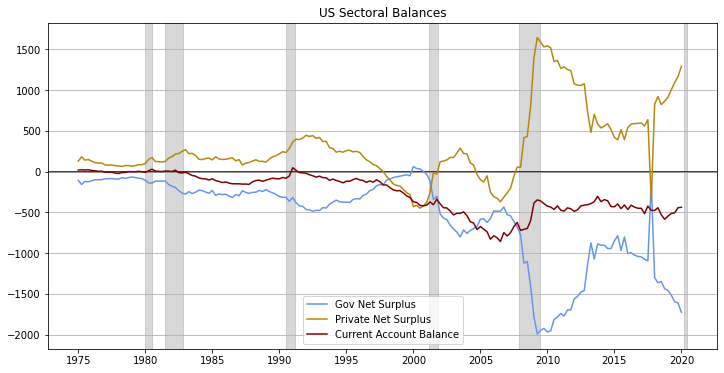

In [28]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(NetLendingGov, color = 'CornflowerBlue', alpha = 1, label = 'Gov Net Surplus')
ax.plot(NetLendingPriv, color = 'DarkGoldenRod', alpha = 1, label = 'Private Net Surplus')
ax.plot(CA,color = 'Maroon', alpha = 1, label = 'Current Account Balance')

# these are all recession periods 
alp = .3
ax.axvspan('1980-01-01','1980-07-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1981-07-01','1982-11-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1990-07-01','1991-03-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2001-03-1','2001-11-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2007-12-1','2009-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2020-3-1','2020-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.yaxis.grid(True)
ax.axhline(0, color = 'black', zorder = -1)
ax.legend()
ax.set_title('US Sectoral Balances')
plt.savefig('SectoralBalance.png', dpi=230)
plt.show()